In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc,Rectangle,ConnectionPatch

In [30]:
data = pd.read_excel("Passmaps.xlsx")
data.drop('Unnamed: 1',inplace=True,axis=1)
data

,Team,Half,HXSTART,HYSTART,HXEND,HYEND,AXSTART,AYSTART,AXEND,AYEND
0,PSG,First Half,45,57,72,48,55,47,71,59
1,PSG,First Half,84,48,76,67,72,18,48,48
2,PSG,First Half,36,64,75,32,39,38,74,61
3,PSG,First Half,78,21,82,52,64,43,42,21
4,PSG,First Half,56,19,67,59,59,35,39,42
5,PSG,First Half,49,49,59,21,40,67,67,53
6,PSG,First Half,61,38,54,43,49,48,68,53
7,PSG,First Half,71,27,77,56,83,50,53,47
8,PSG,First Half,59,69,62,29,48,19,42,29
9,PSG,First Half,38,53,54,67,56,27,73,65


In [33]:
data.columns

Index(['Team ', 'Half', 'HXSTART', 'HYSTART', 'HXEND', 'HYEND', 'AXSTART',
       'AYSTART', 'AXEND', 'AYEND'],
      dtype='object')

In [31]:
data.head()

,Team,Half,HXSTART,HYSTART,HXEND,HYEND,AXSTART,AYSTART,AXEND,AYEND
0,PSG,First Half,45,57,72,48,55,47,71,59
1,PSG,First Half,84,48,76,67,72,18,48,48
2,PSG,First Half,36,64,75,32,39,38,74,61
3,PSG,First Half,78,21,82,52,64,43,42,21
4,PSG,First Half,56,19,67,59,59,35,39,42


In [32]:
def draw_pitch(ax, colour = None, edge = 'black'):
    
    Background = Rectangle([-10,-10], width = 135, height = 95, fill = False)
    # Pitch Outline and Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, edgecolor = edge, fill = False)
    
    if colour:
        Background = Rectangle([-10,-10], width = 135, height = 95, color = colour)
        # Pitch Outline and Centre Line
        Pitch = Rectangle([0,0], width = 120, height = 80, edgecolor = edge, facecolor = colour)
    
    # Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,18], width = 18, height = 44, edgecolor = edge, fill = False)
    RightPenalty = Rectangle([102,18], width = 18, height = 44, edgecolor = edge, fill = False)
    midline = ConnectionPatch([60,0], [60,80], 'data', 'data', color = edge)
    
    # Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,30], width = 6, height = 20, edgecolor = edge, fill = False)
    RightSixYard = Rectangle([114,30], width = 6, height = 20, edgecolor = edge, fill = False)
    
    #Goals
    LeftGoal = Rectangle([-3,36], width = 3, height = 8, linewidth = 1, edgecolor = 'black', fill = False)
    RightGoal = Rectangle([120,36], width = 3, height = 8, linewidth = 1, edgecolor = 'black', fill = False)
    
    # Prepare Circles
    centreCircle = plt.Circle((60,40), 8.1, color = edge, fill = False)
    centreSpot = plt.Circle((60,40), 0.71, color = edge)
    
    # Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((12,40), 0.71, color = edge)
    rightPenSpot = plt.Circle((108,40), 0.71, color = edge)
    leftArc = Arc((14, 40), height = 16.2, width = 16.2, angle = 0, theta1 = 300, theta2 = 60, color = edge)
    rightArc = Arc((106, 40), height = 16.2, width = 16.2, angle = 0, theta1 = 120, theta2 = 240, color = edge)
    
    element = [Background, Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc, LeftGoal, RightGoal]
    for i in element:
        ax.add_patch(i)

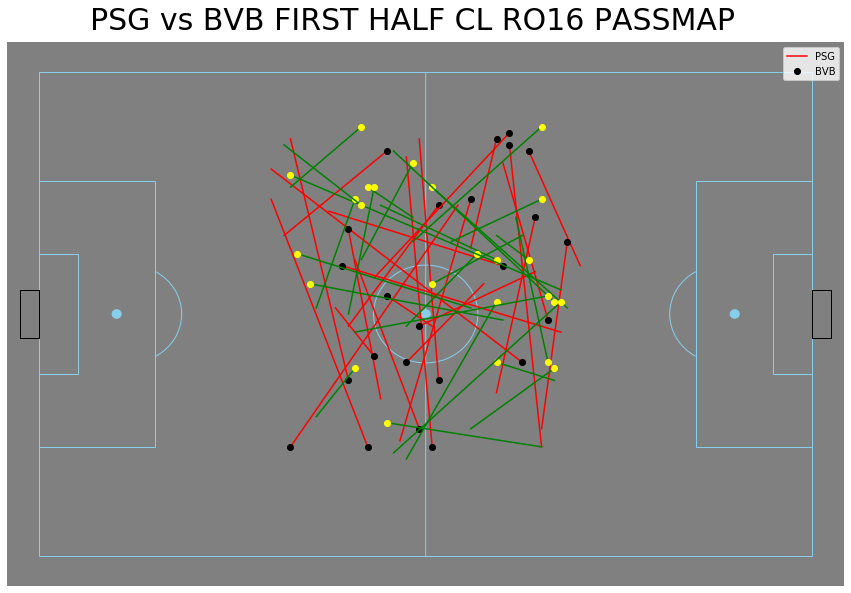

In [83]:
fig = plt.figure()
fig.set_size_inches(15,10)
ax = fig.add_subplot(1,1,1)
plt.ylim(-5, 85)
plt.xlim(-5, 125)
draw_pitch(ax,'grey','skyblue')
for j in range(len(data)):
    if (data['Team '][j] == 'PSG'):
        plt.plot([int(data['HXSTART'][j]),int(data['HXEND'][j])],
                [int(data['HYSTART'][j]),int(data['HYEND'][j])],color='red')
        plt.plot([int(data['HXEND'][j])],[int(data['HYEND'][j])],"o",color='black')
    elif (data['Team '][j] == 'BVB'):
        plt.plot([int(data['AXSTART'][j]),int(data['AXEND'][j])],
                [int(data['AYSTART'][j]),int(data['AYEND'][j])],color='green')
        plt.plot([int(data['AXEND'][j])],[int(data['AYEND'][j])],"o",color='yellow')
plt.axis("off")
labels = ['PSG','BVB']
plt.legend(loc='best',labels=labels)
plt.suptitle("PSG vs BVB FIRST HALF CL RO16 PASSMAP",size=30,y=0.93)
plt.show()


In [40]:
import seaborn as sns

C:\Users\shubham\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\shubham\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\shubham\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\shubham\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


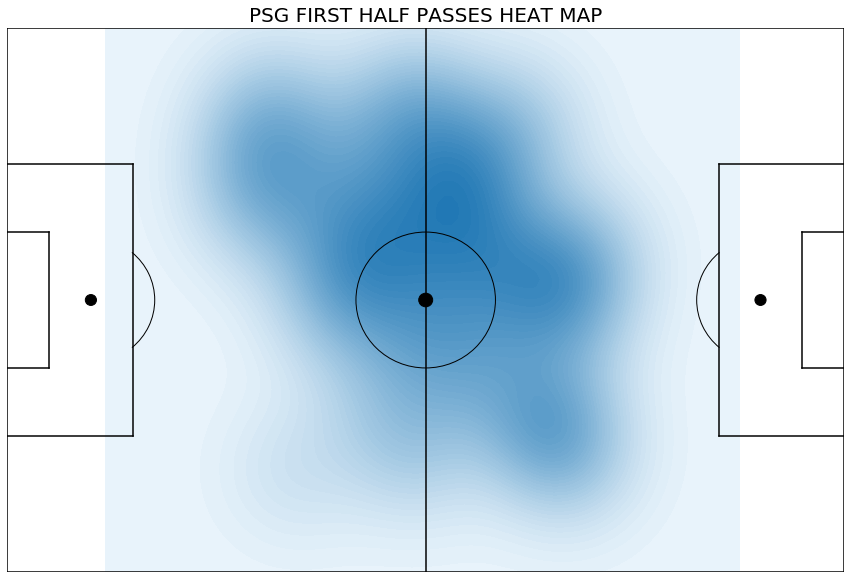

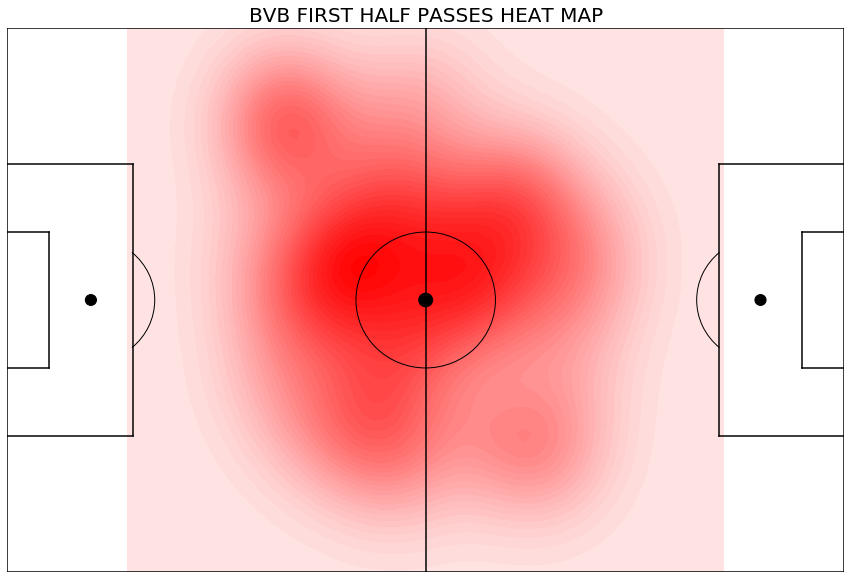

In [84]:
#Create figure
fig=plt.figure()
fig.set_size_inches(15, 10)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,80], color="black")
plt.plot([0,120],[80,80], color="black")
plt.plot([120,120],[80,0], color="black")
plt.plot([120,0],[0,0], color="black")
plt.plot([60,60],[0,80], color="black")

#Left Pen Area
plt.plot([0,18],[20,20],color='black')
plt.plot([0,18],[60,60],color='black')
plt.plot([18,18],[20,60],color='black')

#Left 6-yard box
plt.plot([0,6],[30,30],color='black')
plt.plot([0,6],[50,50],color='black')
plt.plot([6,6],[30,50],color='black')


#Right Area Area
plt.plot([120,102],[20,20],color='black')
plt.plot([120,102],[60,60],color='black')
plt.plot([102,102],[20,60],color='black')

#Right 6-yard box
plt.plot([120,114],[30,30],color='black')
plt.plot([120,114],[50,50],color='black')
plt.plot([114,114],[30,50],color='black')

#Circles
centreCircle = plt.Circle([60,40],radius=10,fill=False)
centreSpot = plt.Circle([60,40],radius=1,color='black')
leftPenSpot = plt.Circle([12,40],radius=0.8,color='black')
rightPenSpot = plt.Circle([108,40],radius=0.8,color='black')



#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((12,40),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((108,40),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')
plt.title("PSG FIRST HALF PASSES HEAT MAP",size=20)
sns.kdeplot(data["HXSTART"],data["HYSTART"], shade=True,n_levels=50)
plt.ylim(0, 80)
plt.xlim(0, 120)

#Create figure
fig=plt.figure()
fig.set_size_inches(15, 10)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,80], color="black")
plt.plot([0,120],[80,80], color="black")
plt.plot([120,120],[80,0], color="black")
plt.plot([120,0],[0,0], color="black")
plt.plot([60,60],[0,80], color="black")

#Left Pen Area
plt.plot([0,18],[20,20],color='black')
plt.plot([0,18],[60,60],color='black')
plt.plot([18,18],[20,60],color='black')

#Left 6-yard box
plt.plot([0,6],[30,30],color='black')
plt.plot([0,6],[50,50],color='black')
plt.plot([6,6],[30,50],color='black')


#Right Area Area
plt.plot([120,102],[20,20],color='black')
plt.plot([120,102],[60,60],color='black')
plt.plot([102,102],[20,60],color='black')

#Right 6-yard box
plt.plot([120,114],[30,30],color='black')
plt.plot([120,114],[50,50],color='black')
plt.plot([114,114],[30,50],color='black')

#Circles
centreCircle = plt.Circle([60,40],radius=10,fill=False)
centreSpot = plt.Circle([60,40],radius=1,color='black')
leftPenSpot = plt.Circle([12,40],radius=0.8,color='black')
rightPenSpot = plt.Circle([108,40],radius=0.8,color='black')



#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((12,40),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((108,40),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

plt.title("BVB FIRST HALF PASSES HEAT MAP",size=20)
sns.kdeplot(data["AXSTART"],data["AYSTART"], shade=True,n_levels=50,color='red')
plt.ylim(0, 80)
plt.xlim(0, 120)
#Tidy Axes
plt.axis('off')


#Display Pitch
plt.show()